# EDA Hispasonic

Exploratory Data Analysis is, on the one hand, a perspective or attitude on data analysis, in which it is urged that The researcher adopts an active attitude in and towards the analysis of them, as a means of suggesting new hypotheses of work. 

The more you know about the data, the better you can use it to make inferential () tests and develop the theories under study. In short, the A.E.D. seeks to maximize all the information offered by the data. The goal here is simply to dig into the data, get to know it better, and see what interesting nuggets we can uncover. No ulteriores motives, no sales pitches – just good old-fashioned data exploration! We're excited to put our knowledge to work and see what insights we can glean from this awesome dataset. Rest assured, we're not planning to use the data for anything shady. It's all about learning and expanding our understanding.

That said, the main objective is to determine which types of ads are going to be the ones that are **not** going to be sold and are going to remain in the Hipasonic database.


In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib as mpl
from matplotlib import pyplot as plt
import datetime as dt
import scipy.stats as stats

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("csv/hp_new202429.csv")

In [4]:
df.shape

(809, 17)

## 1. First contact

A very important thing to keep in mind is that the dataframe has been built from the daily scrapping and that means that there is repeated data, an obvious proof is that the dataframe has a length of 809 first of all we are going to correct this small problem


The first 5 rows.


In [5]:
df.head(5)

,Unnamed: 0,urgent,buy,change,sell,price,gift,search,repair,parts,synt_brand,description,city,published,expire,date_scrapped,seen
0,1,0,0,0,1,120,0,0,0,0,korg,korg volca sample 2,Zaragoza,2024/02/09,2024/07/08,2024/2/9,52
1,2,0,0,0,1,200,0,0,0,0,korg,korg 05r w módulo,Madrid,2023/07/27,2024/07/07,2024/2/9,834
2,3,0,0,0,1,3190,0,0,0,0,clavia,clavia nord stage 4 73 keys,Baleares,2024/02/02,2024/07/05,2024/2/9,385
3,4,0,0,1,0,0,0,0,0,0,roland,roland rd 2000,Madrid,2023/11/19,2024/07/02,2024/2/9,738
4,5,0,0,0,1,425,0,0,0,0,korg,korg drumlogue,Bizkaia,2023/01/24,2024/07/08,2024/2/9,1970


## 2. Dataframe Visualization Transposed Random Samples

After loading, we randomly display and transpose the contents of the dataframe, just have another perspective.

In [6]:
df.sample(5).T

,76,283,44,11,100
Unnamed: 0,77,284,45,12,101
urgent,0,0,0,0,0
buy,0,0,0,0,0
change,0,1,0,0,0
sell,1,0,1,1,1
price,350,0,100,460,3000
gift,0,0,0,0,0
search,0,1,0,0,0
repair,0,0,0,0,0
parts,0,0,0,0,0


## 3. Null Value Detection.

The next step would be to check whether or not we have null values.

In [7]:
df.isnull().sum()

Unnamed: 0       0
urgent           0
buy              0
change           0
sell             0
price            0
gift             0
search           0
repair           0
parts            0
synt_brand       0
description      1
city             0
published        0
expire           0
date_scrapped    0
seen             0
dtype: int64

It looks like we don't have any null values in any of the columns in the dataset.

## 4. Summary:

- The dataset has a header column, this may seem obvious but there are datasets that don't have one, so it doesn't hurt to indicate it.

- We don't have null `NaN` values (missing values)

## 5. Converting data to the right type

If we do a quick inspection we can see that we only have data of numerical type and object type, but that we need to have the appropriate data type formatted in relation to the dates.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     809 non-null    int64 
 1   urgent         809 non-null    int64 
 2   buy            809 non-null    int64 
 3   change         809 non-null    int64 
 4   sell           809 non-null    int64 
 5   price          809 non-null    int64 
 6   gift           809 non-null    int64 
 7   search         809 non-null    int64 
 8   repair         809 non-null    int64 
 9   parts          809 non-null    int64 
 10  synt_brand     809 non-null    object
 11  description    808 non-null    object
 12  city           809 non-null    object
 13  published      809 non-null    object
 14  expire         809 non-null    object
 15  date_scrapped  809 non-null    object
 16  seen           809 non-null    int64 
dtypes: int64(11), object(6)
memory usage: 107.6+ KB


Since we have to convert the date data to the correct format in order to work with it, we are going to check that all the data we have to convert does not give us any problems.

In [9]:
df[['published','expire','date_scrapped']].isnull().sum()

published        0
expire           0
date_scrapped    0
dtype: int64

Sure? 🤔

In [10]:
df['published'].value_counts(dropna=False)

published
2024/02/09    79
2024/02/07    62
2024/02/06    52
2024/02/02    43
2024/02/05    37
2024/02/08    37
2024/02/04    31
2024/02/03    30
2024/01/19    30
2024/01/26    29
2024/01/12    17
              14
2023/12/04     9
2023/12/10     7
2023/09/14     6
2023/09/08     6
2023/12/07     6
2023/12/12     5
2023/11/29     5
2023/12/09     5
2023/10/09     5
2023/10/22     5
2023/12/08     5
2023/12/18     4
2023/11/16     4
2023/12/11     4
2023/11/13     4
2023/10/27     4
2023/12/05     4
2023/11/21     4
2023/11/20     4
2023/09/30     4
2023/11/19     4
2023/10/29     3
2023/11/30     3
2023/11/17     3
2023/07/27     3
2023/12/02     3
2023/09/20     3
2023/11/06     3
2023/07/12     3
2023/10/11     3
2023/07/10     3
2023/11/01     3
2023/09/17     3
2023/03/31     3
2023/09/06     3
2023/10/06     3
2023/11/23     3
2022/01/03     2
2023/12/06     2
2023/09/23     2
2023/10/20     2
2023/09/21     2
2023/07/08     2
2023/10/05     2
2023/09/27     2
2023/11/26     2
2023

Apparently **we have 14 blanks spaces** 🫨. 

This means that we obviously don't have null values, but white space is not a type of data that helps us.

If we want to convert this series in time, **it won't be possible unless we eliminate it**.

In [11]:
df['expire'].value_counts(dropna=False).head(10)

expire
2024/07/08    48
2024/07/06    41
2024/07/07    39
2024/07/05    34
2024/07/09    28
2024/07/17    27
2024/07/16    24
2024/07/04    22
2024/07/03    21
2024/07/15    20
Name: count, dtype: int64

its ok!

In [12]:
df['urgent'].value_counts(dropna=False)

urgent
0    808
1      1
Name: count, dtype: int64

In [13]:
df['date_scrapped'].value_counts(dropna=False)

date_scrapped
2024/2/9    809
Name: count, dtype: int64

ok, too.

### 6. Summary.

In the `published` series there are 14 blank spaces and `urgent` series just one.

The column `published` is very important and removing the blank spaces (14) will allow us to convert the dates in the correct format, however, having found a null value in the `urgent` column has no relevance in our study.


We created the boolean filter that will help us redo our dataset

In [14]:
bool_published = df['published'] != " " # white spaces 
bool_published.value_counts() # content of boolean filter

published
True     795
False     14
Name: count, dtype: int64

If we want to keep the maximum number of values and remove the fewest rows, we apply the Boolean filter to the entire dataset.

In [15]:
ndf = df[bool_published] #
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 795 entries, 0 to 808
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     795 non-null    int64 
 1   urgent         795 non-null    int64 
 2   buy            795 non-null    int64 
 3   change         795 non-null    int64 
 4   sell           795 non-null    int64 
 5   price          795 non-null    int64 
 6   gift           795 non-null    int64 
 7   search         795 non-null    int64 
 8   repair         795 non-null    int64 
 9   parts          795 non-null    int64 
 10  synt_brand     795 non-null    object
 11  description    794 non-null    object
 12  city           795 non-null    object
 13  published      795 non-null    object
 14  expire         795 non-null    object
 15  date_scrapped  795 non-null    object
 16  seen           795 non-null    int64 
dtypes: int64(11), object(6)
memory usage: 111.8+ KB


Now all that's left is to convert the columns we're interested in to datetime.

## 7. Converting Object Data Type to Datetime Data Type

The "SettingWithCopyWarning" warning message suggests that you're trying to assign values to a view in a DataFrame instead of the original DataFrame. This can lead to unexpected or unwanted results. To avoid this warning, you can use the 'copy()' method to create an explicit copy of the DataFrame before performing any mapping operations.

This way, you're working with an explicit copy of the original DataFrame and avoid the "SettingWithCopyWarning" warning.

Their warning appears when pandas encounter something called string mapping: the combination of chaining and mapping, all in one step. It's important to note that this is simply a warning, not a mistake. The code will still run, but the results may not always match what you thought they would be

In [16]:
ndf_copy = ndf.copy() # Avoiding SettingWithCopyWarning!!!

In [17]:
ndf_copy['published_dt'] = pd.to_datetime(ndf_copy['published'])

In [18]:
ndf_copy['expire_dt'] = pd.to_datetime(ndf_copy['expire'])

In [19]:
ndf_copy['date_scrapped_dt'] = pd.to_datetime(ndf_copy['date_scrapped'])

We need to remove the columns that we no longer use.

In [20]:
remove_columns = ['published','expire','date_scrapped']
df_january = ndf_copy.drop(remove_columns, axis=1)

In [21]:
df_january.info()

<class 'pandas.core.frame.DataFrame'>
Index: 795 entries, 0 to 808
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        795 non-null    int64         
 1   urgent            795 non-null    int64         
 2   buy               795 non-null    int64         
 3   change            795 non-null    int64         
 4   sell              795 non-null    int64         
 5   price             795 non-null    int64         
 6   gift              795 non-null    int64         
 7   search            795 non-null    int64         
 8   repair            795 non-null    int64         
 9   parts             795 non-null    int64         
 10  synt_brand        795 non-null    object        
 11  description       794 non-null    object        
 12  city              795 non-null    object        
 13  seen              795 non-null    int64         
 14  published_dt      795 non-null 

## 8. Ratio of categorical to continuous data.

The ratio of categorical to continuous data can influence the approach and techniques used in data analysis. Recognizing this difference will allow you to select the right tools and methods to explore, analyze, and draw meaningful conclusions from your dataset.

<br>

1. **Impact on the selection of analysis techniques**:

    - **Categorical Data**: If you have more categorical data, you may focus more on descriptive analysis techniques, such as frequency charts, bar charts, and trend analysis.

    - **Continuous Data**: If you have more continuous data, you'll likely lean toward more advanced statistical analysis techniques, such as regression, correlation analysis, and predictive modeling.

<br>

2. **Selecting Suitable Visualizations**:

    - **Categorical Data**: For categorical data, you can use bar charts, pie charts, and categorized scatter plots to visualize the distribution and relationships between the different categories.

    - **Continuous Data**: For continuous data, histograms, box plots, and kernel density plots are useful for visualizing the distribution and dispersion of the data.

<br>

3. **Data Pre-processing**:

    - **Categorical Data**: You may need to perform categorical variable coding (e.g., [one-hot encoding](https://www.educative.io/blog/one-hot-encoding)) before applying certain machine learning algorithms.


    - **Continuous Data**: You may need to normalize or standardize continuous data before applying certain algorithms to ensure that all features have equal weight.

<br>


4. **Interpretation of results**:

    - **Categorical Data**: When analyzing categorical data, it is important to interpret frequencies and ratios in the context of categories in order to draw meaningful conclusions.

    - **Continuous Data**: With continuous data, you can perform trend analysis, identify linear or nonlinear relationships, and make predictions based on statistical models.
  
### Exporting clean dataframe 

In [22]:
df_january.to_csv("csv/df_jan_clean"+".csv", index=False)

In [23]:
df_january.shape

(795, 17)

In [24]:
df_january.describe()

,Unnamed: 0,urgent,buy,change,sell,price,gift,search,repair,parts,seen,published_dt,expire_dt,date_scrapped_dt
count,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.0,795.000000,795.000000,795,795,795
mean,405.500629,0.001258,0.021384,0.040252,0.943396,624.564780,0.001258,0.006289,0.0,0.001258,609.144654,2023-10-21 09:16:04.528301824,2024-06-23 11:17:26.037735936,2024-02-08 23:59:59.999999744
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.000000,2015-03-03 00:00:00,2024-01-17 00:00:00,2024-02-09 00:00:00
25%,202.500000,0.000000,0.000000,0.000000,1.000000,120.000000,0.000000,0.000000,0.0,0.000000,152.000000,2023-10-17 00:00:00,2024-06-26 00:00:00,2024-02-09 00:00:00
50%,404.000000,0.000000,0.000000,0.000000,1.000000,300.000000,0.000000,0.000000,0.0,0.000000,312.000000,2024-01-26 00:00:00,2024-07-07 00:00:00,2024-02-09 00:00:00
75%,609.500000,0.000000,0.000000,0.000000,1.000000,700.000000,0.000000,0.000000,0.0,0.000000,621.500000,2024-02-06 00:00:00,2024-07-16 00:00:00,2024-02-09 00:00:00
max,809.000000,1.000000,1.000000,1.000000,1.000000,12000.000000,1.000000,1.000000,0.0,1.000000,22551.000000,2024-02-09 00:00:00,2024-07-30 00:00:00,2024-02-09 00:00:00
std,234.108343,0.035466,0.144751,0.196672,0.231229,987.873816,0.035466,0.079105,0.0,0.035466,1323.739430,NaN,NaN,NaN


In [25]:
df_january.shape[0:1]

(795,)

In [26]:
data_points = df_january.shape[0:1]
actions = ['urgent', 'buy', 'change', 'sell', 'gift', 'search', 'repair','parts']
for action in actions:
    print(f"{action:}" + '\t',(df_january[action].explode().sum() * 100) / data_points,"%")

urgent	 [0.12578616] %
buy	 [2.13836478] %
change	 [4.02515723] %
sell	 [94.33962264] %
gift	 [0.12578616] %
search	 [0.62893082] %
repair	 [0.] %
parts	 [0.12578616] %


To get descriptive statistics for **non-numeric columns**.

In [27]:
df_january.describe(include=object)

,synt_brand,description,city
count,795,794,795
unique,151,781,41
top,roland,dreadbox typhon,Madrid
freq,103,2,222


In [28]:
df_january.describe()

,Unnamed: 0,urgent,buy,change,sell,price,gift,search,repair,parts,seen,published_dt,expire_dt,date_scrapped_dt
count,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.0,795.000000,795.000000,795,795,795
mean,405.500629,0.001258,0.021384,0.040252,0.943396,624.564780,0.001258,0.006289,0.0,0.001258,609.144654,2023-10-21 09:16:04.528301824,2024-06-23 11:17:26.037735936,2024-02-08 23:59:59.999999744
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.000000,2015-03-03 00:00:00,2024-01-17 00:00:00,2024-02-09 00:00:00
25%,202.500000,0.000000,0.000000,0.000000,1.000000,120.000000,0.000000,0.000000,0.0,0.000000,152.000000,2023-10-17 00:00:00,2024-06-26 00:00:00,2024-02-09 00:00:00
50%,404.000000,0.000000,0.000000,0.000000,1.000000,300.000000,0.000000,0.000000,0.0,0.000000,312.000000,2024-01-26 00:00:00,2024-07-07 00:00:00,2024-02-09 00:00:00
75%,609.500000,0.000000,0.000000,0.000000,1.000000,700.000000,0.000000,0.000000,0.0,0.000000,621.500000,2024-02-06 00:00:00,2024-07-16 00:00:00,2024-02-09 00:00:00
max,809.000000,1.000000,1.000000,1.000000,1.000000,12000.000000,1.000000,1.000000,0.0,1.000000,22551.000000,2024-02-09 00:00:00,2024-07-30 00:00:00,2024-02-09 00:00:00
std,234.108343,0.035466,0.144751,0.196672,0.231229,987.873816,0.035466,0.079105,0.0,0.035466,1323.739430,NaN,NaN,NaN


### 1. Summary

The relationship between **categories and continuous data** is very balanced, so it is a dataset that in principle promises a lot since we can make use of descriptive analysis techniques, and we can also explore more advanced statistical analysis techniques, such as regression, correlation analysis, and predictive modeling.

We also see that the number of data points 795 and have a percentage of 94 percent of sales followed by almost 4 percent of change (32 rows) and 1 (8 rows) percent of purchase.

The average selling price of an instrument is around €625€, since the standard deviation is €987 and the difference between the 75th percentile and the mean is €75 (€700 - €625), we can see that the standard deviation is significantly greater than the discrepancy between these two values. This indicates that there is high variability in selling prices in the dataset, which may be due to the presence of outliers or a skewed distribution of the data.

In relation to the descriptive statistics we find that there are 127 different brands of manufacturers, from 41 different cities, that the brand that is repeated the most is Roland, the eurorack modules and the city with the highest number of sales is Madrid.

##  1. **Descriptive analysis**:
   - What is the distribution of selling prices in the dataset?
   - Are there any outliers in the sales data?
   - How are sales distributed by city and product?

### What is the distribution of selling prices in the dataset?

A sales histogram is a graphical representation that shows the distribution of sales for a product or multiple products over a specific period of time. 

In a sales histogram, the horizontal axis usually represents time (e.g., days, weeks, months, years) and the vertical axis represents the number of sales. Each bar in the histogram represents a time interval (e.g., a day, a week, a month) and the height of the bar indicates the number of sales made during that period. 

Therefore, the higher the bar, the higher the number of sales in that specific time interval. Sales histograms are useful for analyzing and understanding variability and patterns in sales over time. They can help identify trends, seasonality, activity spikes, and other patterns that can influence a company's sales and marketing strategies.

In addition, sales histograms can also be useful for comparing the performance of different products or product categories, as well as assessing the impact of external factors such as promotions, seasonal changes, special events, among others, on the company's sales.

**Identifyng outliers**: Use a box plot and other outlier detection techniques to identify if there are any unusual observations that are affecting the average price.

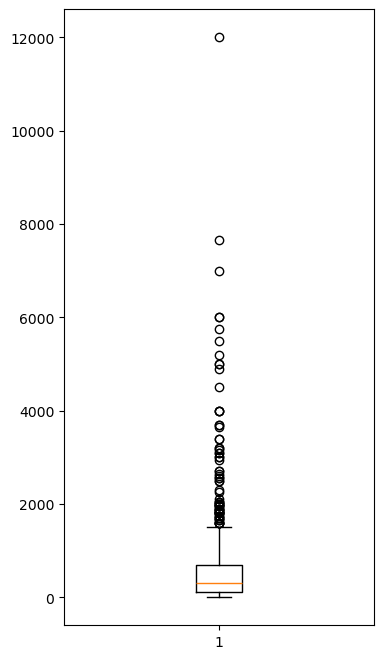

In [29]:
# Outliers taken

fig = plt.figure(figsize =(4, 8))
arr = df_january["price"]
 
plt.boxplot(arr)

plt.show()

Indeed, as [John Tukey](https://en.wikipedia.org/wiki/Exploratory_data_analysis) assured us, we can confirm that the visualization of the **"boxplot and cat whiskers"** tool invented by him self, it offers us a clear view of the existence of extreme values in our dataset.


**Exploring price distribution**: Visualizing the distribution of sales prices using a histogram with more bins to get a more detailed picture of how prices are distributed in our data.

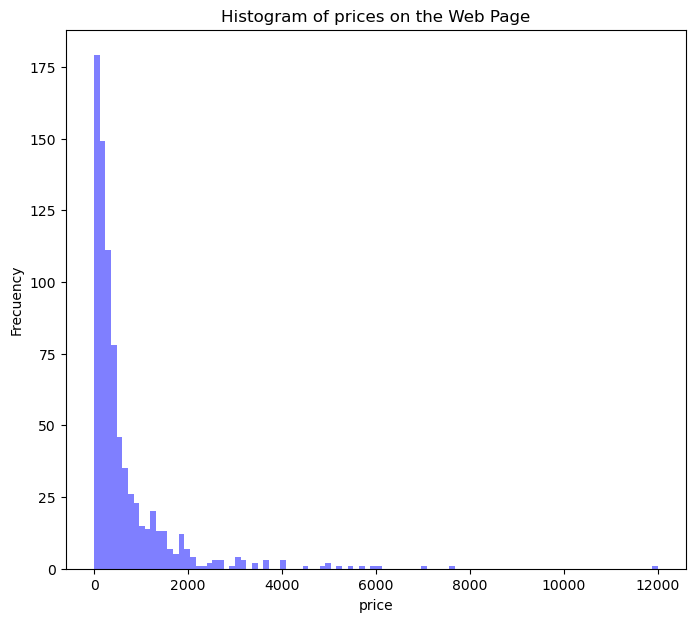

In [30]:
plt.figure(figsize=(8,7))

plt.title('Histogram of prices on the Web Page')

plt.hist(df_january["price"],bins=100, color='blue', alpha=0.5)
plt.xlabel('price')
plt.ylabel('Frecuency')
plt.show()

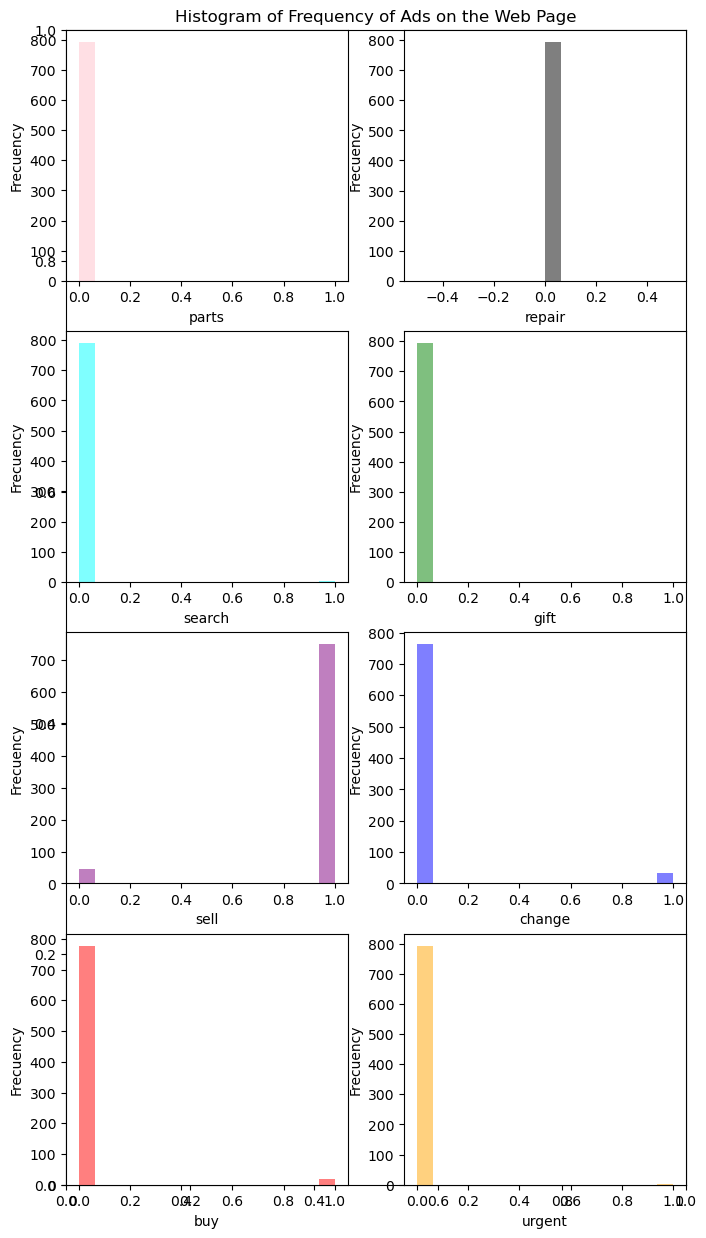

In [31]:
plt.figure(figsize=(8,15))

actions = ['urgent', 'buy', 'change', 'sell', 'gift', 'search', 'repair','parts']
colorines = ["orange","red","blue","purple","green","cyan","black","pink"]

plt.title('Histogram of Frequency of Ads on the Web Page')
for a in range(1,9):
    plt.subplot(4,2,a)
    plt.hist(df_january[actions[-a]],
             bins=16, 
             color=colorines[-a], 
             alpha=0.5)

    plt.xlabel(actions[-a])
    plt.ylabel('Frecuency')
    
plt.show()

**The distribution**: 

- **Description**:
  - The dataset contains 795 entries with various attributes related to advertisements.
  
- **Attributes**:
  - `Unnamed: 0`: Index of the entry.
  - `urgent`, `buy`, `change`, `sell`, `gift`, `search`, `repair`, `parts`: Binary indicators representing different advertisement characteristics.
  - `price`: The selling price of the advertised item.
  - `seen`: Number of times the advertisement has been viewed.
  - `published_dt`: Date and time when the advertisement was published.
  - `expire_dt`: Date and time when the advertisement expires.
  - `date_scrapped_dt`: Date and time when the data was scraped.

- **Statistics**:
  - `count`: Number of non-null entries for each attribute.
  - `mean`: Mean value for each attribute.
  - `min`: Minimum value for each attribute.
  - `25%`, `50%`, `75%`: Percentile values for each attribute.
  - `max`: Maximum value for each attribute.
  - `std`: Standard deviation for each attribute.

- **Insights**:
  - The mean selling price is approximately \$624.56\$, with a standard deviation of \$987.87\$, indicating variability in prices.
  - The mean number of views for advertisements is around 609.14, with a maximum of 22,551 views, suggesting varying levels of advertisement visibility.
  - Advertisement dates range from March 3, 2015, to February 9, 2024, with expiration dates extending to July 30, 2024.
  - Binary indicators (`urgent`, `buy`, `change`, etc.) show low mean values, indicating infrequent occurrence for most categories.


In [32]:
df_january["price"].describe()

count      795.000000
mean       624.564780
std        987.873816
min          0.000000
25%        120.000000
50%        300.000000
75%        700.000000
max      12000.000000
Name: price, dtype: float64



The average price of an synthesizer advertised on Hispasonic is around €625

- Below 25% of the total number of listings the price is €120
- Below 75% of the total number of listings the price is €700

<br>

**Standard Deviation (σ):** 

- Standard deviation measures variability in the data by considering how much each data point deviates from the mean (average) of the data. 

- It's especially useful when you want to understand how scattered the data is around the mean. **If you have a large standard deviation, it means that the data is more dispersed**, while a small standard deviation indicates that the data is closer to the mean.

- Standard deviation is sensitive to outliers, as it takes into account squared differences. A single outlier can significantly affect the standard deviation.

Since the standard deviation is €987 and the difference between the 75th percentile and the mean is €75 (€700 - €625), we can see that the standard deviation is significantly greater than the discrepancy between these two values. 

This indicates that there is high variability in selling prices in your dataset, which may be due to **the presence of outliers or a skewed distribution of the data**.

**Analyze the normality of the distribution**: 

Characteristics and considerations on when to choose to use the different tests to assess the normality of your data:

<br>

1. **Kolmogorov-Smirnov Test (KS)**:
  
- **Sample Size**: It is suitable for large samples.
- **Assumptions**: Does not require assumptions about the shape of the underlying distribution.
- **Applicability**: Useful when you want to compare a sample to a specific probability distribution or when you have no prior knowledge about the distribution of the data.
- **Interpretation of the result**: Provides a test statistic and p-value that indicate whether the data comes from the same distribution as the specified theoretical distribution.
  
<br>

2. **Anderson-Darling Test**:

- **Sample size**: Appropriate for large samples.
- Sensitivity: It is sensitive to the tails of the distribution and can detect deviations in the queues better than other tests.
- **Result Interpretation**: Provides a test statistic and p-value that indicates whether the data comes from a normal distribution.
- **Assumptions**: It does not assume a specific distribution of data and is suitable for a wide range of distributions.

<br>

3. **D'Agostino-Pearson Test**:
- **Sample Size**: It is suitable for moderate to large sized samples.
- **Sensitivity**: Provides three different test statistics (kurtosis, asymmetry, and omnibus), allowing different aspects of normality to be assessed.
- **Result Interpretation**: Provides p-values for each test statistic, where low p-values suggest deviations from normal.
- **Assumptions**: It does not assume a specific distribution of data and is suitable for a wide range of distributions.

<br>

4. **Shapiro-Wilk Test**:
- **Sample size**: Appropriate for moderate- to large-sized samples (usually more than 50 observations).
- **Sensitivity**: It is known to be quite powerful in detecting deviations from normal compared to other tests in small samples.
- **Accuracy**: Provides a more accurate estimate of normal distribution compared to other tests on smaller samples.
- **Interpretation of the result**: Provides a test statistic and p-value, where a low p-value suggests that the data are significantly different from a normal distribution.
- **Assumptions**: Does not assume a specific distribution of data and is suitable for a wide range of distributions.
- **Applicability**: It is useful when you want to assess the normality of the data to apply statistical techniques that require assumptions about normality.


<br>


The choice of the normality test depends on the size of the sample, the required sensitivity, and the shape of the data distribution. Important to consider these characteristics when selecting the most appropriate test for your dataset, the Shapiro-Wilk test is a solid choice for assessing the normality of data, especially in moderate-to-large sized samples, where it is known for its power and accuracy in detecting deviations from normal.

A **QQ-plot (Quantile-Quantile plot)** chart is a visual tool used to compare the distribution of your data with a theoretical distribution, such as the normal distribution. 


Shapiro-Wilk Test Statistician: 0.5664966106414795
Valor p: 2.2154388591128925e-40


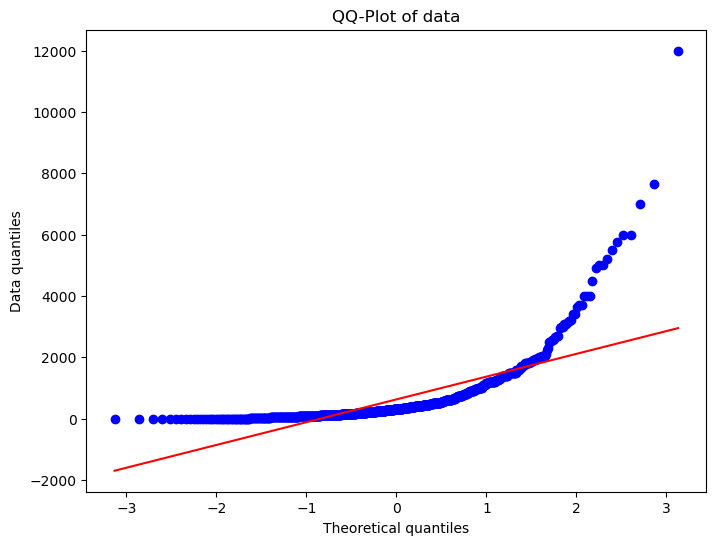

The null hypothesis is rejected. Data does not follow a normal distribution.


In [33]:
# Perform the Normality Test (Shapiro-Wilk) in the Column of Interest
stat, p_valor = stats.shapiro(df_january['price']) # interest column
print("Shapiro-Wilk Test Statistician:", stat)
print("Valor p:", p_valor)

# Graphic QQ-plot
plt.figure(figsize=(8, 6))
stats.probplot(df_january['price'], dist="norm", plot=plt)
plt.title('QQ-Plot of data')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Data quantiles')
plt.show()

# Interpreting the Normality Test Result
alfa = 0.05
if p_valor > alfa:
    print("The null hypothesis is not rejected. The data could come from a normal distribution.")
else:
    print("The null hypothesis is rejected. Data does not follow a normal distribution.")


<br>



In the context of the **Shapiro-Wilk** test it provide information about the normality of your data. 

Most crucial is the **p-value** associated with the test statistic, which provides the statistical evidence to **accept** or **reject** the null hypothesis of normality.


1. **Shapiro-Wilk Test Statistic**:
- The test statistic is a number calculated by the Shapiro-Wilk test that is used to evaluate whether your data conforms to a normal distribution.
- In general, the higher the test statistic, the more likely it is that the data will come from a normal distribution
- However, the exact interpretation of this value depends on the sample size and other factors.

2. **p Value**:
- The p-value is the probability of looking at the calculated test statistic, or a more extreme test statistic, under the assumption that the null hypothesis is true.
- In the context of the Shapiro-Wilk test, the null hypothesis (H0) is that the data come from a normal distribution.
- A low p-value (usually less than a predefined significance level, such as 0.05) suggests that there is sufficient evidence to reject the null hypothesis and conclude that the data do not follow a normal distribution.

In this specific case, the **Shapiro-Wilk** test statistic is **0.5664966106414795** and the p-value is **2.2154388591128925e-40**. This suggests that:

- The test statistic is relatively high, indicating a possible approximation to normal, but the extremely low **p-value** indicates that there is significant evidence to reject the null hypothesis of normality, suggesting that your data does not follow a normal distribution.

- **Reference diagonal**: In a QQ-plot chart, the diagonal line represents the theoretical distribution you're comparing to your data. In the case of the normal distribution, this line should be a straight line running through the origin (0,0).

- **Points on the graph**: Each point on the graph represents a quantile of your data and the corresponding quantile of the theoretical distribution. If the data follows the theoretical distribution exactly, the points will line up along the diagonal line.

- **Deviations from the diagonal line**: Deviations of the points from the diagonal line indicate deviations from the theoretical distribution. If the dots are above the diagonal line, it indicates that your data has heavier tails than the theoretical distribution. If the dots are below the diagonal line, it indicates that your data has lighter tails than the theoretical distribution.

- **Curve shape**: The overall shape of the curve in the QQ-plot chart can provide additional information about the distribution of your data. For example, if the points form an S-shaped curve, it could indicate a bimodal distribution or an asymmetric distribution.

When interpreting a **QQ-plot** chart, you look to see if the points roughly follow the diagonal reference line. Any deviation from this line suggests that your data might not follow the theoretical distribution you're comparing, prompting you to further investigate the nature of this discrepancy.

Therefore, the data does not follow a normal distribution.

**Next step would be to investigate external factors**: Examine whether there are external factors, such as changes in demand, market fluctuations, or specific events, that may be influencing the variability of selling prices, but this is beyond the scope of the study.

The ultimate goal of these actions is to gain a more complete understanding of the distribution of sales prices in the dataset and determine if there is any specific reason behind the discrepancy between the mean and the 75th percentile.

Understanding what standard deviation is and using box-plot, histograms and QQ-plot, we have checked the existence of outliers, the frequency of the different actions (buy, sell, exchange) and analysed the normality of the distribution.

We can see that most of the ads have relatively low prices, while the ads with the highest prices are the ones with the fewest

## 2. **Visualizations**:

Visualizations that help us understand the context.

### - What is the best-selling brand??

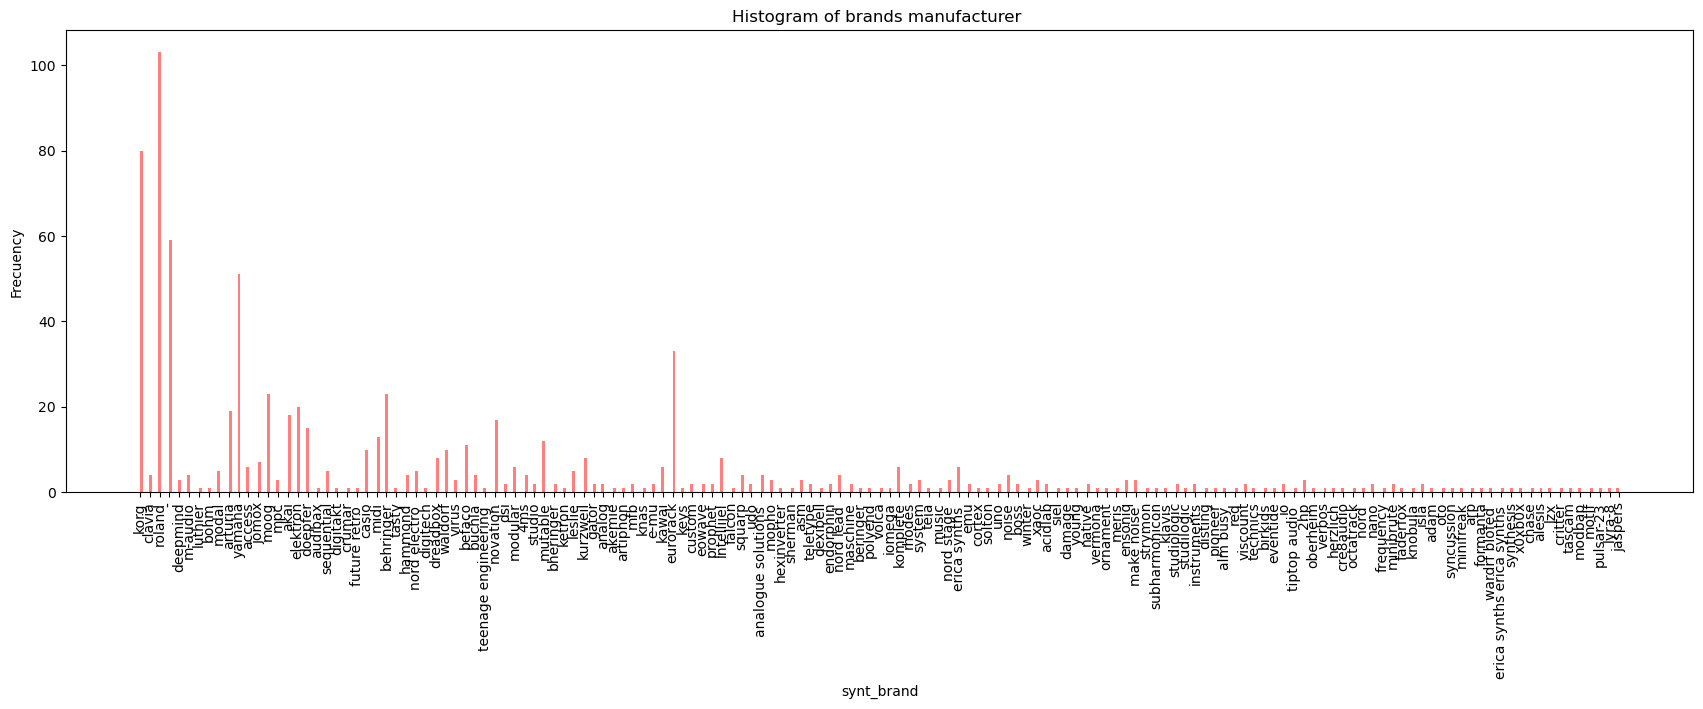

In [34]:
plt.figure(figsize=(21,6))

plt.title('Histogram of brands manufacturer ')

plt.hist(df_january["synt_brand"],bins=500, color='red', alpha=0.5)
plt.xlabel('synt_brand')
plt.xticks(rotation=90)
plt.ylabel('Frecuency')
plt.show()

It is clearly observed that Roland is the most It is the manufacturer brand that has the most sales ads in Hispasonic, followed by Korg and in third place '-'. 

The latter is the label that represents everything that includes advertisements where either the name of the manufacturer is not recognized or simply refers to accessories, changes... 

It's notable that this segment ranks third in terms of ads, indicating their relevance within the page. 

Here is a random sample of 10 rows of the content of the `-` tag.

In [35]:
df_january[df_january["synt_brand"] == "-"].sample(10) #random sample of dataset

,Unnamed: 0,urgent,buy,change,sell,price,gift,search,repair,parts,synt_brand,description,city,seen,published_dt,expire_dt,date_scrapped_dt
374,375,0,0,0,1,480,0,0,0,0,-,mochika x-5 átomosynth sinte semimodular,Madrid,1053,2023-05-15,2024-07-15,2024-02-09
755,756,0,0,0,1,425,0,0,0,0,-,teenage op-z mas extras,Pontevedra,78,2024-02-09,2024-07-30,2024-02-09
530,531,0,0,0,1,90,0,0,0,0,-,polyseq magerit,Valladolid,128,2024-02-07,2024-07-24,2024-02-09
359,360,0,0,0,1,290,0,0,0,0,-,microfreak stellar + microfono + decksaver,Valencia,354,2024-02-02,2024-07-14,2024-02-09
59,60,0,1,0,0,0,0,0,0,0,-,buzz audio elixir,Sevilla,236,2024-02-03,2024-07-03,2024-02-09
122,123,0,0,0,1,150,0,0,0,0,-,malekko varigate 4+ black leer bien,Barcelona,861,2023-07-03,2024-07-08,2024-02-09
571,572,0,0,0,1,600,0,0,0,0,-,kyma capy ls,Madrid,541,2023-10-11,2024-06-30,2024-02-09
573,574,0,0,1,0,0,0,0,0,0,-,"cambio, o vendo, funda transporte modx7 por la...",Valencia,300,2024-02-02,2024-06-29,2024-02-09
461,462,0,0,0,1,20,0,0,0,0,-,key control 25xt,Madrid,26,2024-02-09,2024-07-18,2024-02-09
720,721,0,0,0,1,180,0,0,0,0,-,electro harmonix bass microsynth,Madrid,102,2024-02-07,2024-07-19,2024-02-09


### - Which is the city with the most ads?

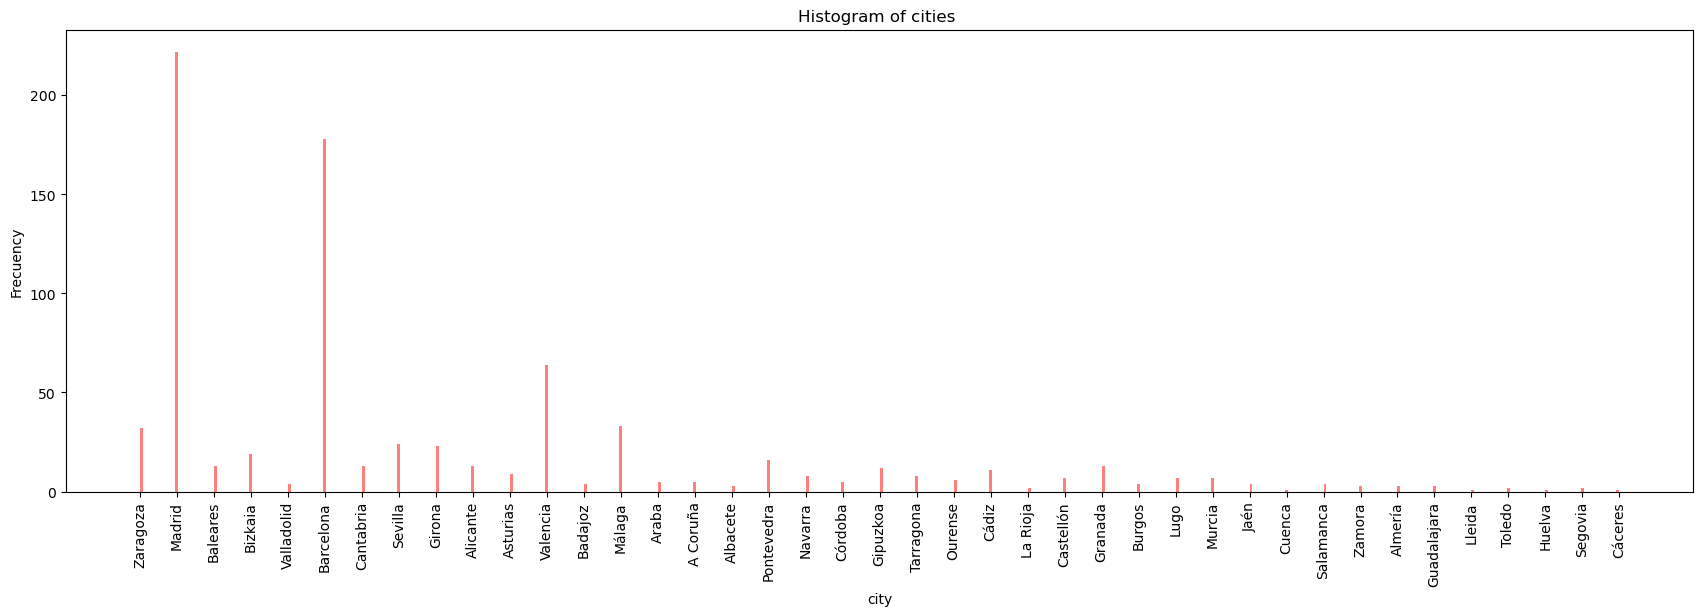

In [36]:
plt.figure(figsize=(21,6))

plt.title('Histogram of cities ')

plt.hist(df_january["city"],bins=500, color='red', alpha=0.5)
plt.xlabel('city')
plt.xticks(rotation=90)
plt.ylabel('Frecuency')
plt.show()

###  How the manufacturer's brands are distributed by city

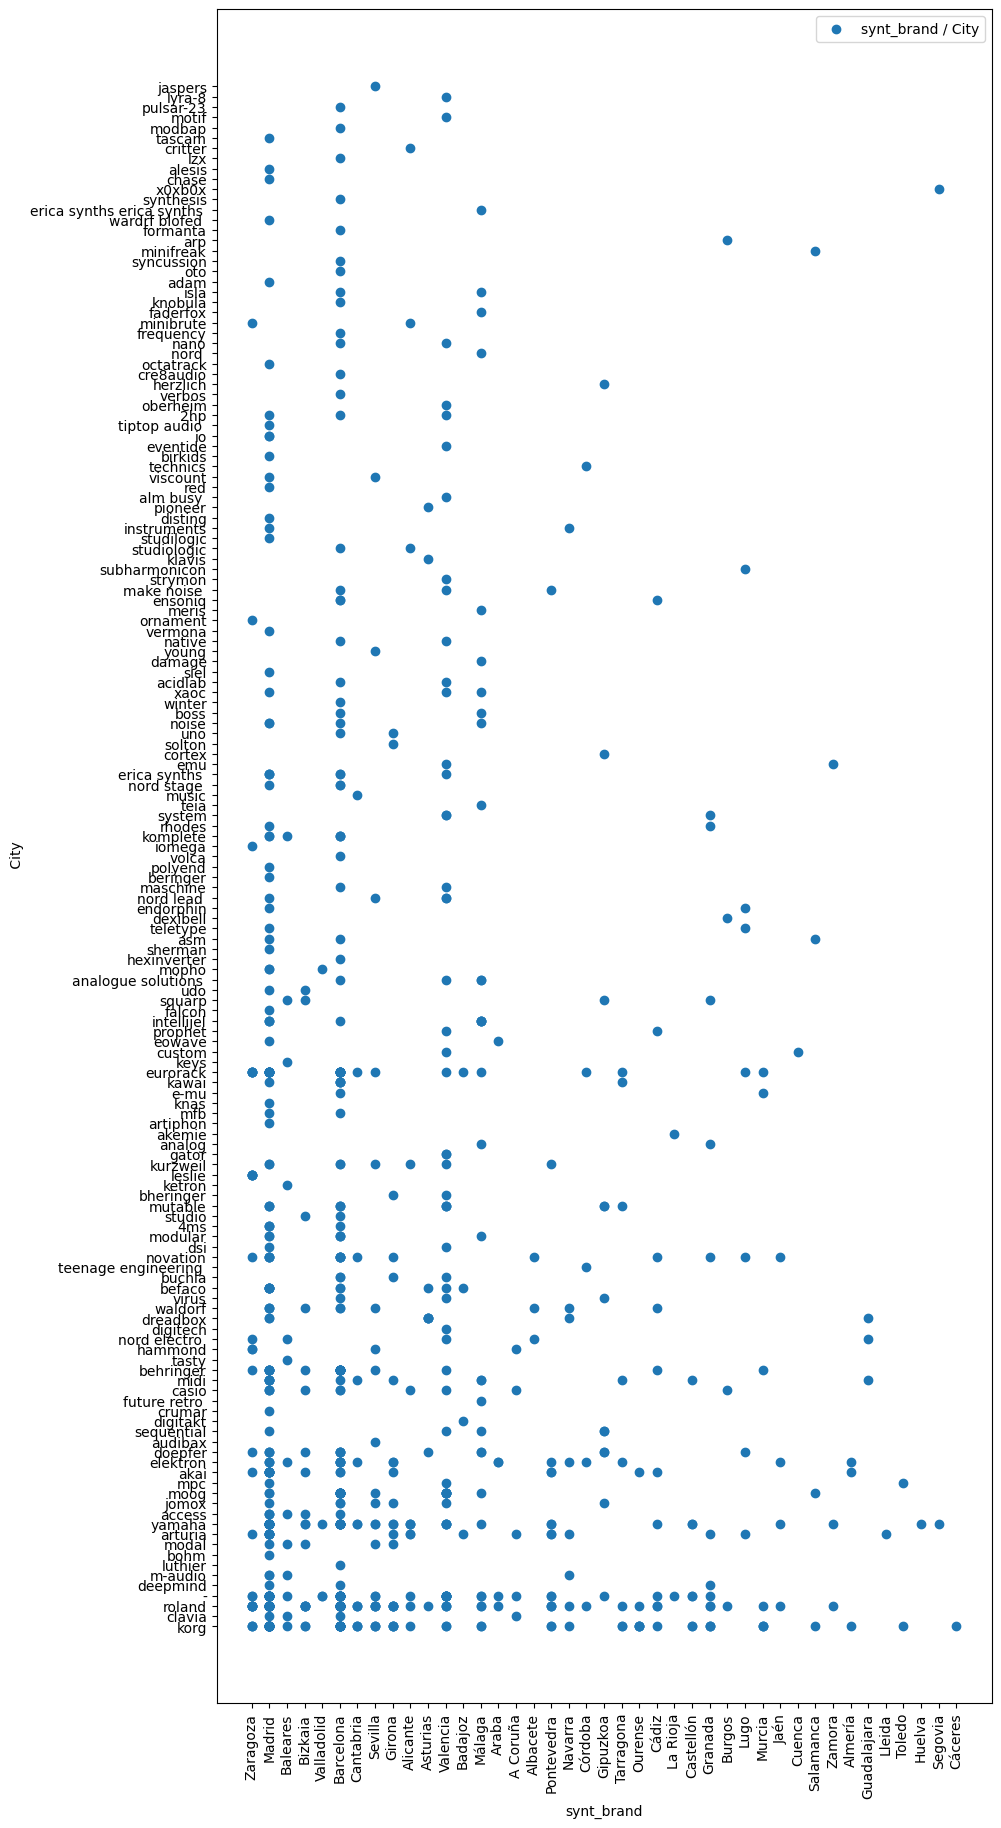

In [37]:
plt.figure(figsize=(10,22))
plt.xlabel("synt_brand")
plt.ylabel(" City")
plt.scatter(df_january["city"],df_january["synt_brand"], label = "synt_brand / City")
plt.xticks(rotation=90)
plt.legend()
plt.show()

### Eliminamos la columna de cuando fue hecho el scrapping

In [38]:
df_january.columns

Index(['Unnamed: 0', 'urgent', 'buy', 'change', 'sell', 'price', 'gift',
       'search', 'repair', 'parts', 'synt_brand', 'description', 'city',
       'seen', 'published_dt', 'expire_dt', 'date_scrapped_dt'],
      dtype='object')

In [39]:
january_drop = df_january.drop(['Unnamed: 0',
                                'date_scrapped_dt',
                                'urgent',
                                'buy',
                                'sell',
                                'gift',
                                'search',
                                'seen',
                                'search',
                                'expire_dt',
                                'urgent',
                                'repair',
                                'parts',
                                'change',
                                'description'],
                               axis = 1)

### What is the distribution of price by brand (`Roland`) in the cities where it is sold?

Let's use a Boolean filter again to consider only the ads of the **best-selling** [`Roland`](https://www.roland.com/global/) brand to determine the price of the ads by city.

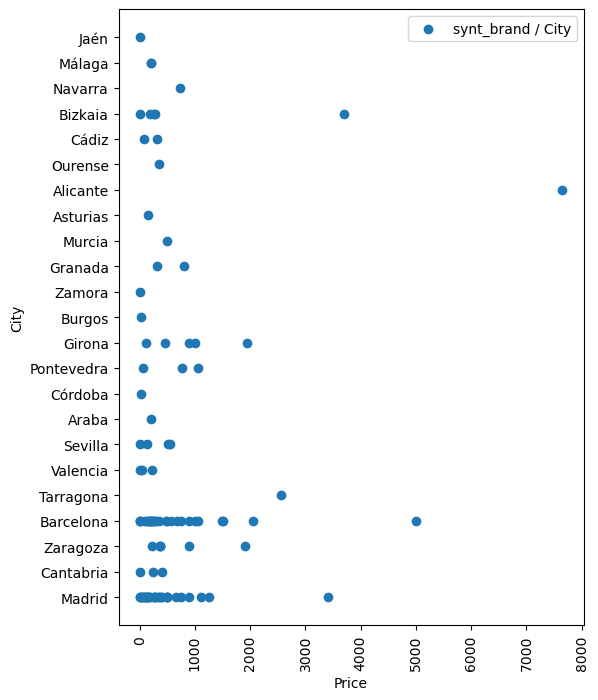

In [40]:
roland_all = df_january[df_january["synt_brand"] == "roland"] # boolean filter

plt.figure(figsize=(6,8))
plt.xlabel("Price")
plt.ylabel("City")
plt.scatter(roland_all["price"],roland_all["city"], label = "synt_brand / City")
plt.xticks(rotation=90)
plt.legend()
plt.show()

These are the cities in which Roland brand keyboards ads are announced, we can quickly observe what the prices are in each of the cities

In [41]:
roland_all.describe(include=object)

,synt_brand,description,city
count,103,103,103
unique,1,101,23
top,roland,roland fantom 06,Madrid
freq,103,2,30


In [42]:
roland_all.describe()

,Unnamed: 0,urgent,buy,change,sell,price,gift,search,repair,parts,seen,published_dt,expire_dt,date_scrapped_dt
count,103.000000,103.0,103.000000,103.000000,103.000000,103.000000,103.0,103.000000,103.0,103.0,103.000000,103,103,103
mean,402.708738,0.0,0.019417,0.058252,0.932039,611.038835,0.0,0.009709,0.0,0.0,648.145631,2023-10-24 02:19:48.349514496,2024-06-26 10:29:07.572815616,2024-02-09 00:00:00
min,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,12.000000,2020-08-28 00:00:00,2024-01-31 00:00:00,2024-02-09 00:00:00
25%,218.500000,0.0,0.000000,0.000000,1.000000,140.000000,0.0,0.000000,0.0,0.0,162.000000,2023-10-05 12:00:00,2024-07-01 00:00:00,2024-02-09 00:00:00
50%,391.000000,0.0,0.000000,0.000000,1.000000,280.000000,0.0,0.000000,0.0,0.0,362.000000,2024-01-19 00:00:00,2024-07-08 00:00:00,2024-02-09 00:00:00
75%,576.500000,0.0,0.000000,0.000000,1.000000,665.000000,0.0,0.000000,0.0,0.0,814.000000,2024-02-06 00:00:00,2024-07-15 00:00:00,2024-02-09 00:00:00
max,809.000000,0.0,1.000000,1.000000,1.000000,7650.000000,0.0,1.000000,0.0,0.0,6136.000000,2024-02-09 00:00:00,2024-07-30 00:00:00,2024-02-09 00:00:00
std,220.895265,0.0,0.138662,0.235365,0.252910,1050.468410,0.0,0.098533,0.0,0.0,878.875835,NaN,NaN,NaN


It is possible to see that although we do not have minimum or maximum values in the columns, the reason of standard deviation varies (¿?), so to make sure what is the reason we are going to apply a value counts to each of the columns.

In [43]:
actions = ['urgent','buy','change','sell','gift','search','repair','parts']

for action in actions:
    show = roland_all[action].value_counts()
    print(f"{show}",'\n')

urgent
0    103
Name: count, dtype: int64 

buy
0    101
1      2
Name: count, dtype: int64 

change
0    97
1     6
Name: count, dtype: int64 

sell
1    96
0     7
Name: count, dtype: int64 

gift
0    103
Name: count, dtype: int64 

search
0    102
1      1
Name: count, dtype: int64 

repair
0    103
Name: count, dtype: int64 

parts
0    103
Name: count, dtype: int64 



This was the reason for this inappreciable variation. There are people who buy, others who change one of them who is looking for...

---

### Description ad

We can see the content of the descriptions that belong to the `Roland` brand (we could see any other brand), if what we want is to see what  description correspond to the brand and if it is repeated.

In [44]:
roland_all['description'].sample(5).value_counts()

description
sintetizador roland alpha juno 1             1
roland juno-60 + md-8 midi dcb interface     1
teclado controlador roland a-800 pro         1
roland e15                                   1
módulo roland jv-1010                        1
Name: count, dtype: int64

### Summary:

We see how the descriptions of the ads are not repeated and there are only two ads that are repeated in the case of `Roland`.

From the same principle and with some modification we will easily visualize when `Befaco` was sold, where it was put up for sale and what the price was, it won't have as many sales as Roland, but it can help us to see the contrast between `Roland`.


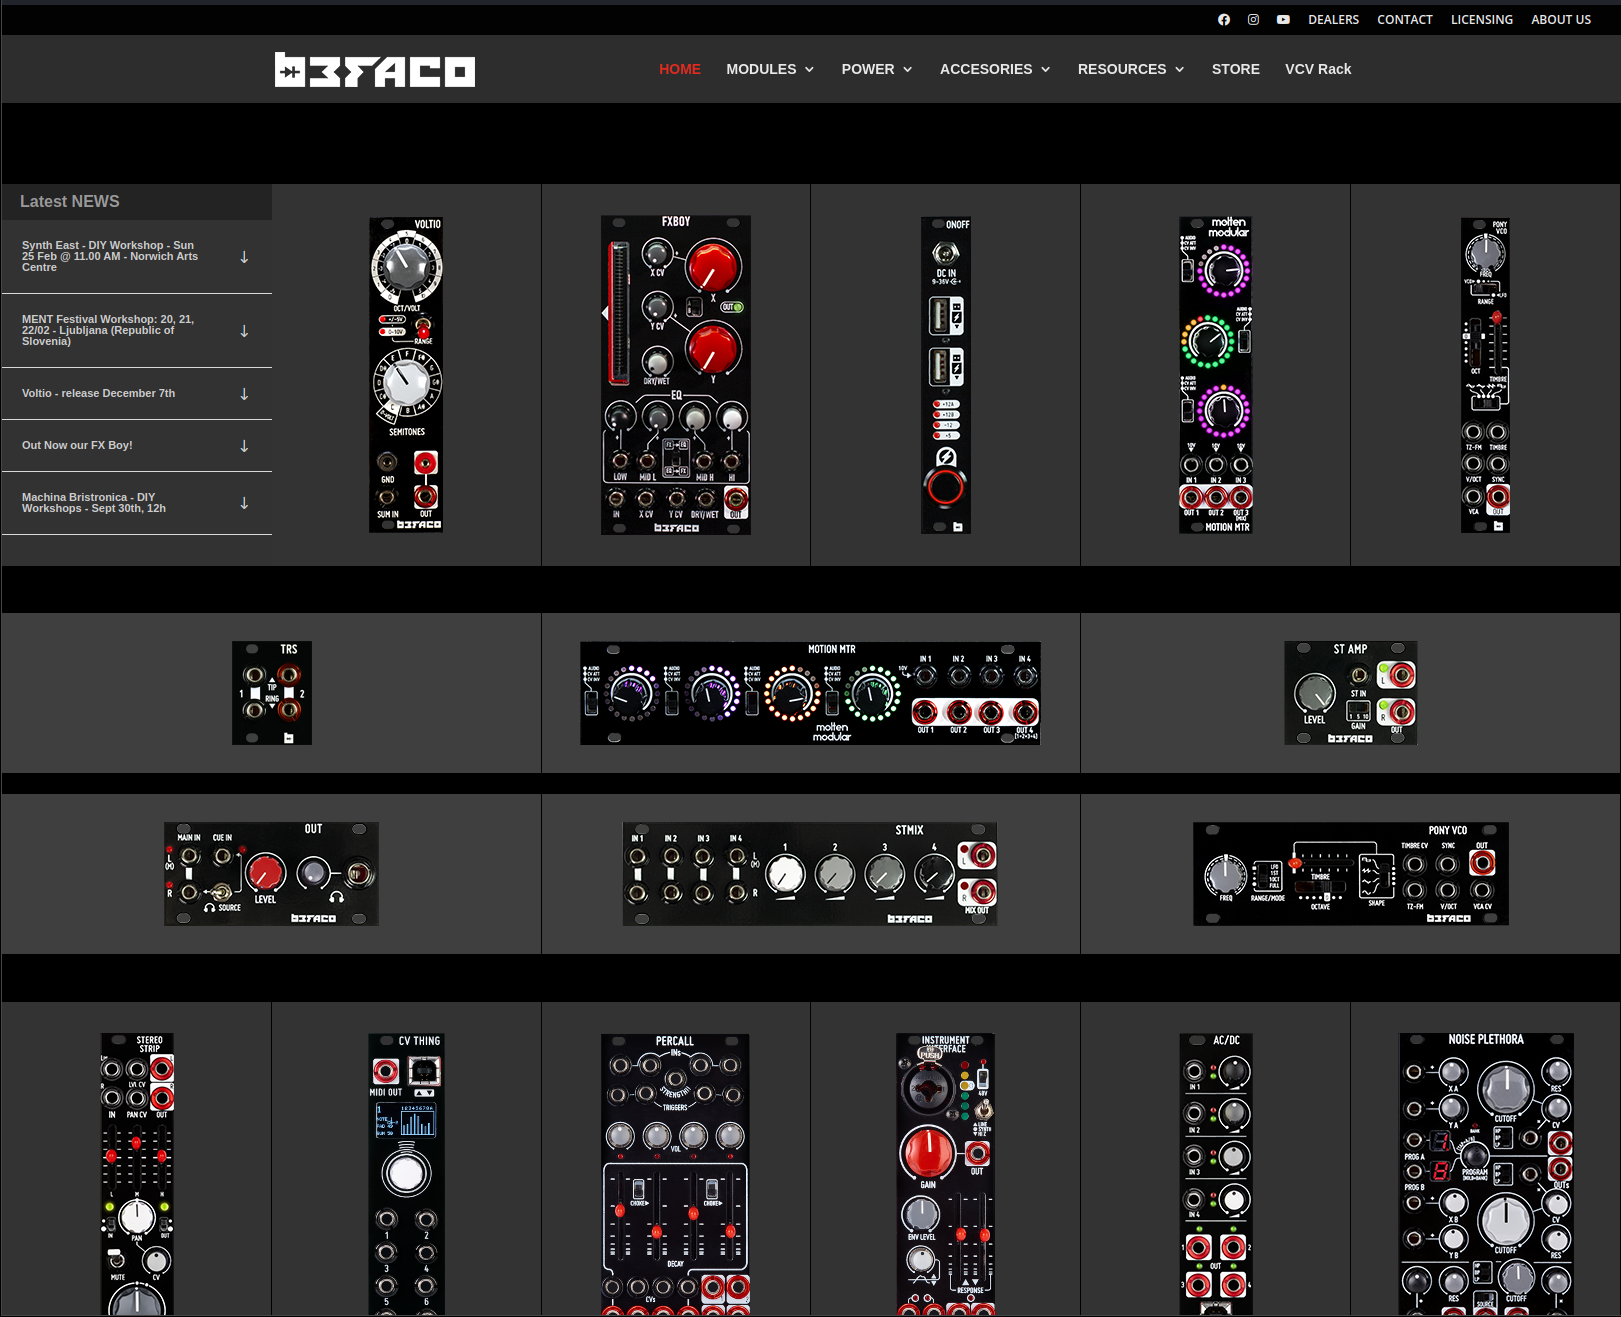


`Befaco` is a little brand of modules for modular synthesizers made in Spain with a reputed name in the DIY world.

<br>

Let's see what information we can extract from the following functions.

In [45]:
def df_synt_brand(mark): # return the result of filter the manufacturer brand in the whole dataframe.  
    return df_january[df_january["synt_brand"] == mark]

In [46]:
def scatter_price_synth_cities(brand):
    plt.figure(figsize=(15,5))
    txt = f"Price Distribution of {brand} ads based on date and City"
    plt.title(txt,x=0.485, y=1.095, fontsize=14)
    plt.xlabel("Price")
    plt.ylabel("City")
    x = df_synt_brand(brand)["published_dt"]
    y = df_synt_brand(brand)["city"]
    z = df_synt_brand(brand)["price"]
    plt.scatter(x,y,s=z*3, alpha=0.2)  # El tamaño de los puntos se ajusta según los precios
    for i, txt in enumerate(z):  # Iterar sobre los precios y agregarlos como etiquetas en los puntos
        plt.annotate(txt, (x.iloc[i], y.iloc[i]), fontsize=8)

    plt.xticks(rotation=90)
    plt.show()

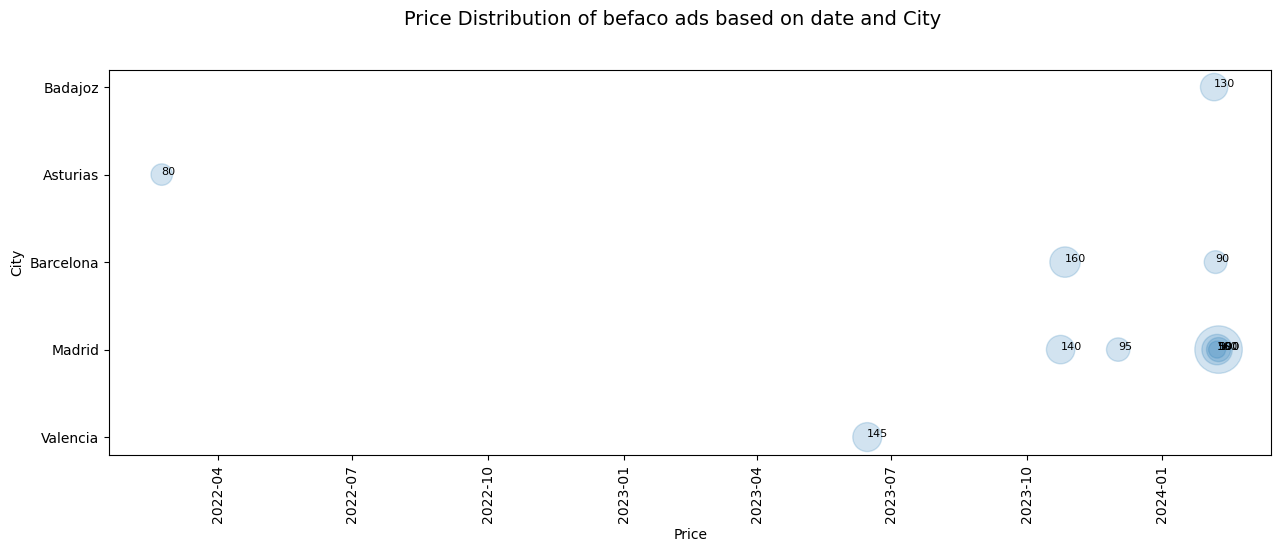

In [47]:
scatter_price_synth_cities("befaco")

In [48]:
df_synt_brand("befaco").describe()

,Unnamed: 0,urgent,buy,change,sell,price,gift,search,repair,parts,seen,published_dt,expire_dt,date_scrapped_dt
count,11.000000,11.0,11.0,11.0,11.0,11.000000,11.0,11.0,11.0,11.0,11.000000,11,11,11
mean,481.818182,0.0,0.0,0.0,1.0,140.000000,0.0,0.0,0.0,0.0,379.454545,2023-10-18 06:32:43.636363520,2024-06-08 02:10:54.545454592,2024-02-09 00:00:00
min,62.000000,0.0,0.0,0.0,1.0,50.000000,0.0,0.0,0.0,0.0,50.000000,2022-02-22 00:00:00,2024-01-19 00:00:00,2024-02-09 00:00:00
25%,396.500000,0.0,0.0,0.0,1.0,92.500000,0.0,0.0,0.0,0.0,136.000000,2023-10-25 12:00:00,2024-04-22 12:00:00,2024-02-09 00:00:00
50%,503.000000,0.0,0.0,0.0,1.0,130.000000,0.0,0.0,0.0,0.0,142.000000,2024-02-05 00:00:00,2024-07-15 00:00:00,2024-02-09 00:00:00
75%,616.500000,0.0,0.0,0.0,1.0,152.500000,0.0,0.0,0.0,0.0,257.500000,2024-02-07 00:00:00,2024-07-25 00:00:00,2024-02-09 00:00:00
max,768.000000,0.0,0.0,0.0,1.0,390.000000,0.0,0.0,0.0,0.0,1424.000000,2024-02-08 00:00:00,2024-07-28 00:00:00,2024-02-09 00:00:00
std,225.184288,0.0,0.0,0.0,0.0,90.138782,0.0,0.0,0.0,0.0,515.833958,NaN,NaN,NaN


**Explanation of price diversity and ad visibility for `befaco`:**


- **Ad prices:** Looking at the descriptive statistics in the pricing column, we can notice that prices vary from a minimum of 50 to a maximum of 390, with an average of approximately 140. The standard deviation of around 90.14 indicates that prices tend to spread around the mean. This suggests that there is a diversity of prices in the ads, with some being more expensive than others.

- **Ad views:** The descriptive statistics in the views column show that the number of views varies from a low of 50 to a high of 1424, with an average of approximately 379.45. The standard deviation of around 515.83 is quite high, suggesting a lot of variability in the number of views the ads receive. This could indicate that some ads receive a great deal of attention, while others receive less.

- **Ad places** Where there are more sales at the time the analysis was made are:
- Madrid
- Barcelona
- Badajoz

<br>

We are going to do the same but we are going to choose the brand that is most advertised in hispasonic which is `Roland`.



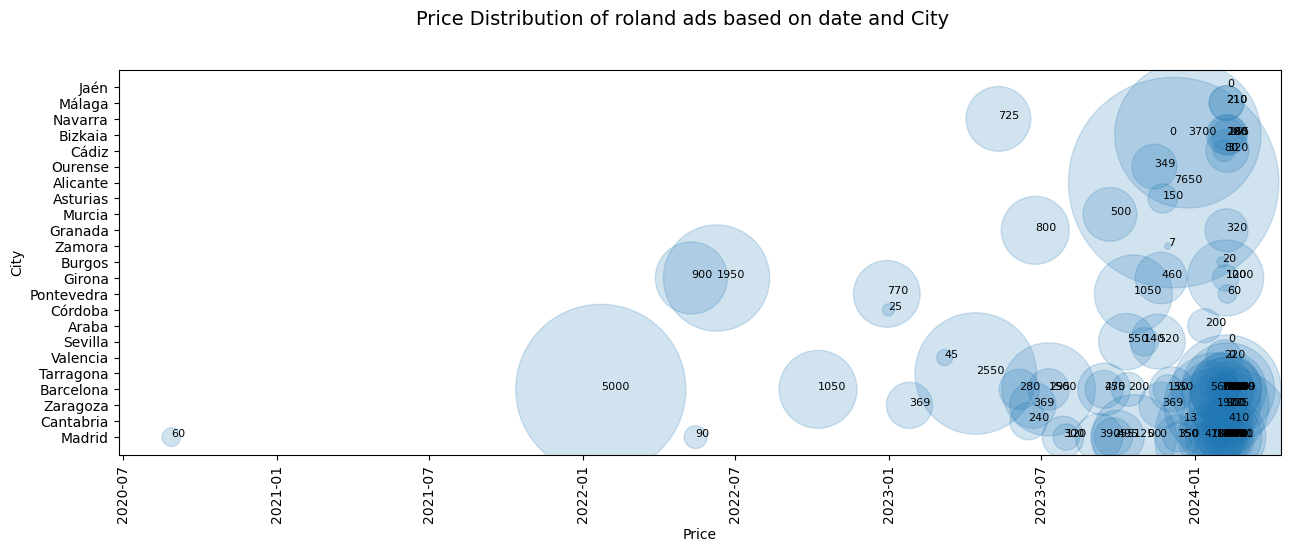

In [49]:
scatter_price_synth_cities("roland")

In [50]:
df_synt_brand("roland").describe()

,Unnamed: 0,urgent,buy,change,sell,price,gift,search,repair,parts,seen,published_dt,expire_dt,date_scrapped_dt
count,103.000000,103.0,103.000000,103.000000,103.000000,103.000000,103.0,103.000000,103.0,103.0,103.000000,103,103,103
mean,402.708738,0.0,0.019417,0.058252,0.932039,611.038835,0.0,0.009709,0.0,0.0,648.145631,2023-10-24 02:19:48.349514496,2024-06-26 10:29:07.572815616,2024-02-09 00:00:00
min,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,12.000000,2020-08-28 00:00:00,2024-01-31 00:00:00,2024-02-09 00:00:00
25%,218.500000,0.0,0.000000,0.000000,1.000000,140.000000,0.0,0.000000,0.0,0.0,162.000000,2023-10-05 12:00:00,2024-07-01 00:00:00,2024-02-09 00:00:00
50%,391.000000,0.0,0.000000,0.000000,1.000000,280.000000,0.0,0.000000,0.0,0.0,362.000000,2024-01-19 00:00:00,2024-07-08 00:00:00,2024-02-09 00:00:00
75%,576.500000,0.0,0.000000,0.000000,1.000000,665.000000,0.0,0.000000,0.0,0.0,814.000000,2024-02-06 00:00:00,2024-07-15 00:00:00,2024-02-09 00:00:00
max,809.000000,0.0,1.000000,1.000000,1.000000,7650.000000,0.0,1.000000,0.0,0.0,6136.000000,2024-02-09 00:00:00,2024-07-30 00:00:00,2024-02-09 00:00:00
std,220.895265,0.0,0.138662,0.235365,0.252910,1050.468410,0.0,0.098533,0.0,0.0,878.875835,NaN,NaN,NaN


**Explanation of price diversity and ad visibility with `Roland`:**

- **Price diversity:** The data shows a wide range of prices for ads, with prices ranging from a low of 0 to a high of 7650. The mean of about 611.04 and the standard deviation of about 1050.47 indicate considerable dispersion in prices. This suggests that in the dataset there are ads with very low prices, as well as others with significantly higher prices. This price diversity may reflect differences in the quality, demand, or characteristics of the products advertised.

- **Ad viewability:** The 'seen' column shows the number of times ads have been viewed, with a range ranging from a minimum of 12 to a maximum of 6136. The mean of about 648.15 and the standard deviation of about 878.88 indicate significant variability in the number of views ads receive. Some ads have been viewed many times, while others have had less visibility. This can be due to a variety of factors, such as the popularity of the advertised product, the effectiveness of the marketing strategy, or the relevance of the ad to the target audience

- **Ad places** The geographic diversity in the dataset suggests a variety of advertised products with different levels of demand and attention from users. 



### Correlation between price and ad-related attributes

Correlation helps us understand whether there is a relationship between two variables and how this relationship manifests itself.

Whether both variables change together, whether they change in opposite directions, or whether they are unrelated to each other. 

It is a useful tool to better understand the interactions between different phenomena or measures.

In [51]:
price_city_corr = df_january[['urgent',
                              'buy',
                              'change',
                              'sell',
                              'price',
                              'gift',
                              'search',
                              'repair',
                              'parts',
                              'seen',
                              'published_dt',
                              'expire_dt']].corr()['price']
price_city_corr

urgent         -0.019396
buy            -0.048606
change         -0.003436
sell            0.019576
price           1.000000
gift           -0.022451
search         -0.050329
repair               NaN
parts          -0.022271
seen            0.206973
published_dt   -0.113454
expire_dt       0.035035
Name: price, dtype: float64

Here's the result:


- **Urgency (-0.019396):** There is a very weak negative correlation between the urgency of ads and their price. This suggests that listings marked as urgent tend to have slightly lower prices, although the ratio is minimal.

- **Buy (-0.048606):** There is a weak negative correlation between the intent to buy ads and their price. This indicates that ads with purchase intent may have slightly lower prices, but the ratio is relatively low.

- **Change (-0.003436):** The correlation between the exchangeability of ads and their price is very low and close to zero, suggesting a negligible relationship between these two attributes.

- **Sell (0.019576):** There is a very weak positive correlation between the sellability of ads and their price. This indicates that sellable ads may have slightly higher prices, although the ratio is minimal.

- **Price (1.000000):** The correlation of an attribute with itself is always perfect (1.000000), since it is the same variable. Therefore, this entry shows the perfect correlation between the price of the ads and themselves.

- **Gift (-0.022451):** There is a very weak negative correlation between the gift chance of ads and their price. This suggests that ads offering freebies may have slightly lower prices, although the ratio is minimal.

- **Search (-0.050329):** There is a weak negative correlation between the search need for ads and their price. This indicates that ads that require more active search may have slightly lower prices, although the ratio is relatively low.

- **Repair (NaN):** The correlation between the repairability of ads and their price cannot be calculated due to the lack of variation in one of the attributes.

- **Parts (-0.022271):** There is a very weak negative correlation between the availability of parts for listings and their price. This suggests that ads offering parts may have slightly lower prices, although the ratio is minimal.

- **Display (0.206973):** There is a moderate positive correlation between the number of times ads have been viewed and their price. This indicates that ads that have been viewed more times tend to have higher prices, suggesting a possible relationship between viewability and perception of value.

- **Publication date (-0.113454):** There is a moderate negative correlation between the publication date of the ads and their price. This suggests that more recently published ads tend to have slightly lower prices, which may be due to depreciation over time or changes in supply and demand.

- **Expiration Date (0.035035):** There is a very weak positive correlation between the expiration date of ads and their price. This indicates that ads with farther expiration dates may have slightly higher prices, although the ratio is minimal.


The correlation table **reveals that there are certain associations between the price of ads and various attributes related to their delivery and viewability**, although many of these correlations are very weak or moderate. This suggests that other factors may be significantly influencing the price of ads, and further analysis may be necessary to fully understand the relationship between these variables.

### Is there any relationship between the number of views and the city?

In [52]:
df_january.columns

Index(['Unnamed: 0', 'urgent', 'buy', 'change', 'sell', 'price', 'gift',
       'search', 'repair', 'parts', 'synt_brand', 'description', 'city',
       'seen', 'published_dt', 'expire_dt', 'date_scrapped_dt'],
      dtype='object')

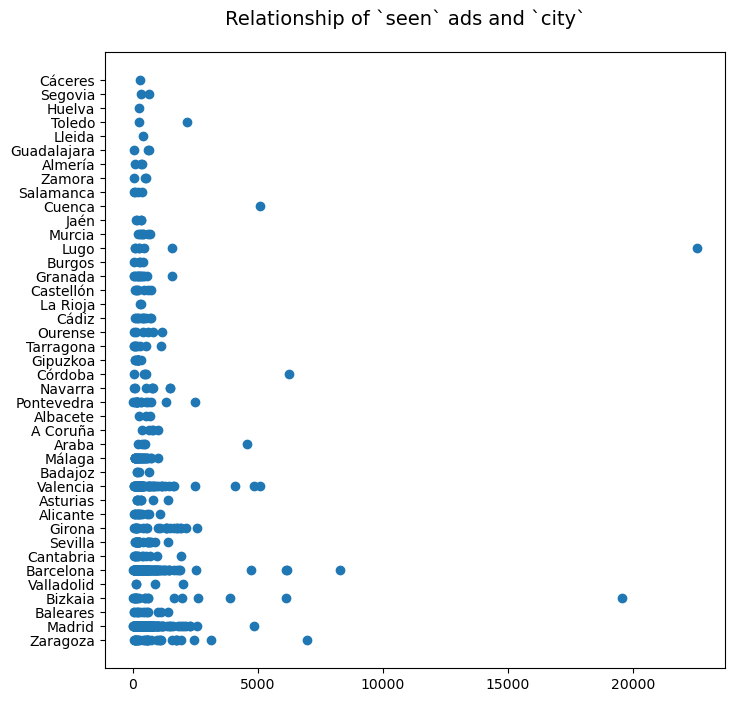

In [53]:
plt.figure(figsize=(8,8))

plt.title(' Relationship of `seen` ads and `city` ',x=0.485, y=1.03, fontsize=14)
plt.scatter(df_january["seen"], df_january["city"])
plt.show()

In [54]:
df_encoded = pd.get_dummies(df_january) # Cities hot encoding technique , columns=['city']

In [55]:
# Get the relevant columns for the correlation calculation
relevant_columns = [col for col in df_encoded.columns if col.startswith('city_')] # selecting cities
relevant_columns.append('price') # adding cities
relevant_columns.append('seen')  # adding cities

In [56]:
df_encoded.columns

Index(['Unnamed: 0', 'urgent', 'buy', 'change', 'sell', 'price', 'gift',
       'search', 'repair', 'parts',
       ...
       'city_Pontevedra', 'city_Salamanca', 'city_Segovia', 'city_Sevilla',
       'city_Tarragona', 'city_Toledo', 'city_Valencia', 'city_Valladolid',
       'city_Zamora', 'city_Zaragoza'],
      dtype='object', length=987)

In [57]:
# Calculate the correlation between the relevant columns and the 'price' column
price_city_corr = df_encoded[relevant_columns].corr()['price']
price_city_corr.sort_values(ascending=False)

price               1.000000
seen                0.206973
city_A Coruña       0.054251
city_Barcelona      0.051185
city_Girona         0.048239
city_Baleares       0.046420
city_Bizkaia        0.042204
city_Alicante       0.039930
city_Lleida         0.035064
city_Tarragona      0.033490
city_Valencia       0.030912
city_Huelva         0.024280
city_Zaragoza       0.021424
city_Murcia         0.008020
city_Navarra        0.007704
city_Ourense        0.006913
city_Valladolid     0.006154
city_Albacete       0.004287
city_Guadalajara    0.003144
city_Sevilla       -0.002685
city_Cáceres       -0.005197
city_Cádiz         -0.009186
city_Almería       -0.010467
city_Araba         -0.012616
city_La Rioja      -0.014984
city_Toledo        -0.015238
city_Segovia       -0.016001
city_Zamora        -0.019257
city_Salamanca     -0.019417
city_Cuenca        -0.021768
city_Badajoz       -0.024099
city_Pontevedra    -0.024343
city_Granada       -0.024817
city_Gipuzkoa      -0.025035
city_Burgos   



**Description of the correlation between price and cities:**

The correlation table shows the relationship between the price of ads and the different cities where they are run. Below are the correlations obtained:

- **Price (1.000000):** The correlation of an attribute with itself is always perfect (1.000000), since it is the same variable. Therefore, this entry shows the perfect correlation between the price of the ads and themselves.

- **Seen (0.206973):** There is a moderate positive correlation between the number of times ads have been viewed and their price. This indicates that ads that have been viewed more times tend to have higher prices, suggesting a possible relationship between viewability and perception of value.

 **Cities:**
  
- **Cities with positive correlation:** Cities such as `A Coruña (0.054251)`, `Barcelona (0.051185)`, `Girona (0.048239)`, `Balearic Islands (0.046420)`, among others, have **positive correlations with the price of ads**. This suggests that ads posted in these cities tend to have slightly higher prices.
  
- **Cities with negative correlation:** On the other hand, cities such as `Madrid (-0.046066)`, `Asturias (-0.048065)`, `Cantabria (-0.041604)`, among others, have **negative correlations with the price of ads**. This suggests that ads posted in these cities tend to have slightly lower prices.
 
 Some cities have positive correlations with price, suggesting higher prices, while other cities have negative correlations, suggesting lower prices. This may reflect differences in cost of living, market demand, or other regional factors that affect ad prices in different geographic areas.

In [58]:
price_city_corr = df_encoded[relevant_columns].corr()['price']
seen_city_corr = df_encoded[relevant_columns].corr()['seen']

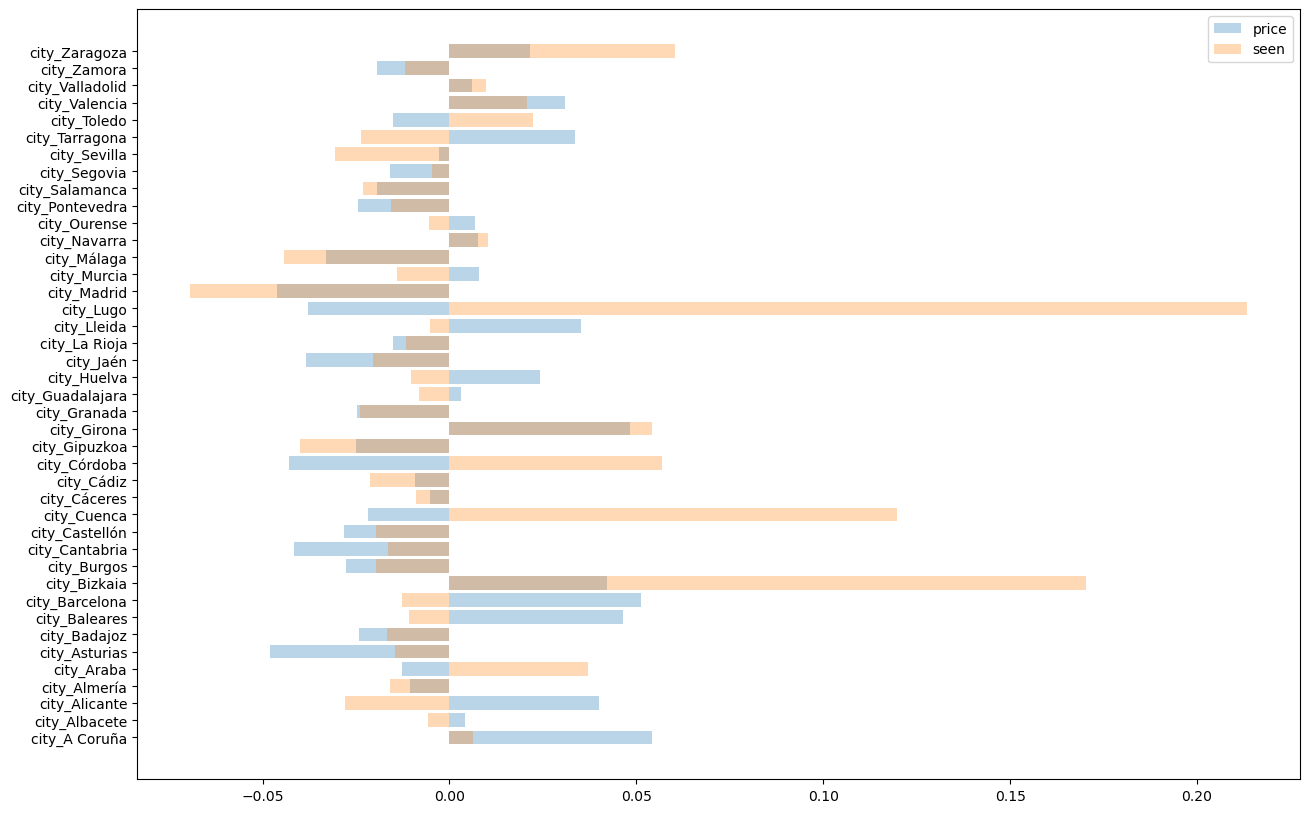

In [59]:
fig, ax = plt.subplots(figsize=(15, 10))
name_column = ['price','seen']
new_price_city_corr = price_city_corr.drop(name_column, axis=0)
new_seen_city_corr = seen_city_corr.drop(name_column, axis=0)

ax.barh(new_price_city_corr.index, new_price_city_corr,alpha = 0.3, label="price")
ax.barh(new_seen_city_corr.index, new_seen_city_corr,alpha = 0.3, label="seen")
plt.legend()
plt.show()

The graph is explained as follows. There are two graphs, one blue and the other orange. If the bar is to the left of zero, it means that the correlation is negative, and if it is to the right, it is a positive correlation. 

- We look at the graph corresponding to the city of `Zaragoza`, they indicate that both have a positive correlation, that is, there is a correlation between the price increase and the display of the ad.

- We visualize `Madrid`, what we see is the tendency that the less the ad is worth, the fewer visits it will have.

- `Lugo` is also a particular case, the correlation indicates that the cheaper the ad will have a greater number of views and in the case that it is more expensive the number of views will be lower.

A negative correlation assumes that the higher the price, the lower the display of ads in that city, and if the correlation of price and visits is positive, then it means that the higher the price, the more visits are obtained.

From the following functions we will check if what we assume is true or not.

In [60]:
def important_things_in(city):
    boolean_city = df_january["city"] == city  
    df_city = df_january[boolean_city] 
    max_seen = df_city["seen"].max()
    unique_seen = df_city["seen"] == max_seen
    return df_city[unique_seen]

In [61]:
important_things_in("Lugo")

,Unnamed: 0,urgent,buy,change,sell,price,gift,search,repair,parts,synt_brand,description,city,seen,published_dt,expire_dt,date_scrapped_dt
522,523,0,0,0,1,5,0,0,0,1,novation,"teclas y para roland, korg, yamaha, novation u...",Lugo,22551,2015-03-03,2024-07-23,2024-02-09


In [62]:
important_things_in("Girona")

,Unnamed: 0,urgent,buy,change,sell,price,gift,search,repair,parts,synt_brand,description,city,seen,published_dt,expire_dt,date_scrapped_dt
776,777,0,0,0,1,950,0,0,0,0,yamaha,yamaha motif xs6,Girona,2569,2022-06-08,2024-07-30,2024-02-09


We can take this idea a little bit further considering that we are now able to know which product is the one that captures the most interest in each city.

If we enter the name of the city `Lugo` and filter by the maximum number of views, we see what attracts so much attention in `Lugo` and indeed the advertisement shows the sale of spare parts for different machines by 5€, while in `Girona` the most visited ad has been a **[Yamaha motif xs6](https://piano-keyboard-reviews.com/brands/yamaha-keyboards/motif-xs6-review/)** for **950€**.

Looking at the effect that price has in different places, we could assure that depending on what is sold and where the price is sold can be a good way to attract views to the ad.

## Summary

1. **Best-selling brand:**

    - Roland is the most promoted brand on Hispasonic, followed by Korg.
    - There is also a "name" `-` that includes ads where the manufacturer's name is not recognized or simply refers to accessories or changes and also is very important.

<br>

2. **City and ads:**
    - `Madrid` is the city with the most ads, followed by `Barcelona` and `Valencia`.

<br>

3. **Distribution of brands by city:**

    - There is a varied distribution of brands by city, suggesting diversity in product offerings in different regions, each city has its own way of understanding the market.

<br>

4. **Price diversity and ad visibility:**

    - Ad prices vary considerably, with some being more expensive than others.
    - Additionally, there is a high variability in the number of times ads are viewed, suggesting that some receive a lot of attention while others receive less.

<br>

5. **Correlation between price and ad-related attributes:**

    - There is a moderate positive correlation between the price of ads and the number of times they are viewed. This suggests that ads that are viewed more times tend to have higher prices, indicating a possible perception of higher value by users.
   
<br>

6. **Correlation between price and cities:**

    - Some cities have a positive correlation with the price of ads, suggesting higher prices in those areas, while others have a negative correlation, indicating lower prices and high numbers of views.

<br>

7. **Impact on ad visibility:**

    - The negative correlation between price and ad visibility suggests an inverse relationship between these two variables in the analyzed cities.
    - This means that in some cities, higher-priced ads tend to receive fewer views.

<br>


8. **Exploration of ads in a specific city:**

    - When exploring ads in the city of Lugo, we find that the most viewed ad does not have a standout intrinsic value, suggesting that the high number of views may be influenced by other factors.

  <br>
